# 👨‍🏫 “Chappie vs Tracy: ANN Showdown on MNIST”
![pic](ct.png)

Train and compare two hand-coded Artificial Neural Networks (ANNs) — Chappie and Tracy — on the full MNIST dataset (10 classes), from scratch using NumPy.



🧠 Dataset: MNIST (0–9 digits)
Input size: 784 (28x28 flattened)

Output: 10 classes → one-hot encoded targets

Normalize pixel values (0–255 → 0–1)

Use train/test split from sklearn or keras.datasets

To make learning Artificial Neural Networks (ANNs) exciting, we introduce two digital warriors: Chappie and Tracy — each representing a different neural network architecture.

## Chappie 
Architecture: 1 hidden layer (784 → 64 → 10)

Personality: Fast, lightweight, and efficient.

Strengths:

Simpler structure

Trains quickly

Easier to visualize and debug

Weaknesses:

May struggle with complex patterns

Limited capacity to learn deep features

## Tracy 
Architecture: 2 hidden layers (784 → 128 → 64 → 10)

Personality: Smart, analytical, and detail-oriented.

Strengths:

Learns more abstract features

Can model complex relationships

Higher flexibility and power

Weaknesses:

Takes longer to train

Slightly harder to tune

In this notebook, Tracy and Chappie go head-to-head on the MNIST battlefield! Let’s see who classifies handwritten digits better!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split



In [2]:
# Step 1: Load & Preprocess Data
# ======================

# Load MNIST-style CSV
df = pd.read_csv("mnist_train.csv")
X = df.drop("label", axis=1).values / 255.0
y = to_categorical(df["label"].values, num_classes=10)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Step 2: Define Chappie (1 hidden layer)
# ======================

def create_chappie():
    model = Sequential([
        Input(shape=(784,)),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [4]:
# Step 3: Define Tracy (2 hidden layers)
# ======================

def create_tracy():
    model = Sequential([
        Input(shape=(784,)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [5]:
# Step 4: Train Both Models
# ======================

print("Training Chappie (🦾)...")
chappie = create_chappie()
history_chappie = chappie.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.1, verbose=1)



Training Chappie (🦾)...
Epoch 1/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8146 - loss: 0.6716 - val_accuracy: 0.9337 - val_loss: 0.2366
Epoch 2/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9356 - loss: 0.2285 - val_accuracy: 0.9463 - val_loss: 0.1868
Epoch 3/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9509 - loss: 0.1719 - val_accuracy: 0.9533 - val_loss: 0.1555
Epoch 4/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9636 - loss: 0.1294 - val_accuracy: 0.9567 - val_loss: 0.1398
Epoch 5/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9675 - loss: 0.1116 - val_accuracy: 0.9625 - val_loss: 0.1223
Epoch 6/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9746 - loss: 0.0927 - val_accuracy: 0.9646 - val_loss: 0.1164
Epoch 7/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9789 - loss: 0.0761 - val_accuracy: 0.9667 - val_loss: 0.1119
Epoch 8/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9803 - loss: 0

In [6]:
print("\nTraining Tracy (🤖)...")
tracy = create_tracy()
history_tracy = tracy.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1, verbose=1)



Training Tracy (🤖)...
Epoch 1/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8426 - loss: 0.5592 - val_accuracy: 0.9538 - val_loss: 0.1578
Epoch 2/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9555 - loss: 0.1463 - val_accuracy: 0.9650 - val_loss: 0.1173
Epoch 3/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9719 - loss: 0.0955 - val_accuracy: 0.9692 - val_loss: 0.1078
Epoch 4/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9786 - loss: 0.0701 - val_accuracy: 0.9685 - val_loss: 0.1046
Epoch 5/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9836 - loss: 0.0520 - val_accuracy: 0.9719 - val_loss: 0.0965
Epoch 6/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9869 - loss: 0.0396 - val_accuracy: 0.9735 - val_loss: 0.0897
Epoch 7/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9916 - loss: 0.0302 - val_accuracy: 0.9729 - val_loss: 0.0922
Epoch 8/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9928 - loss: 0.

In [7]:
# Step 5: Evaluate Models
# ======================

loss_c, acc_c = chappie.evaluate(X_test, y_test, verbose=0)
loss_t, acc_t = tracy.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Chappie Accuracy: {acc_c*100:.2f}%")
print(f"✅ Tracy Accuracy: {acc_t*100:.2f}%")


✅ Chappie Accuracy: 97.03%
✅ Tracy Accuracy: 97.03%


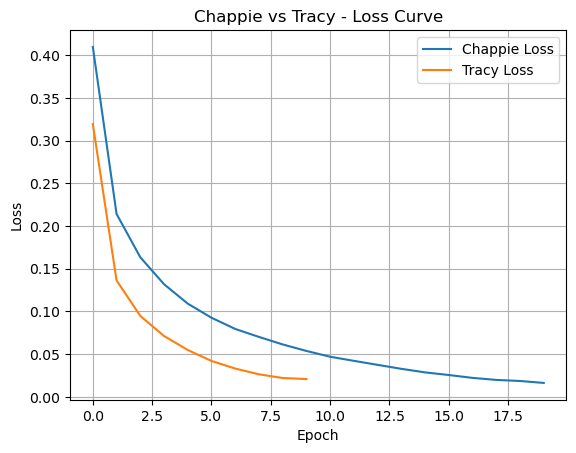

In [8]:
# Step 6: Plot Training Loss
# ======================

plt.plot(history_chappie.history['loss'], label='Chappie Loss')
plt.plot(history_tracy.history['loss'], label='Tracy Loss')
plt.title("Chappie vs Tracy - Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


🔍 Sample Predictions from Tracy
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


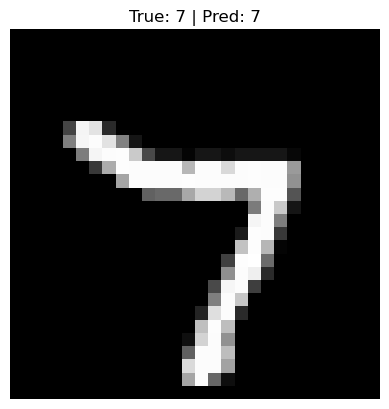

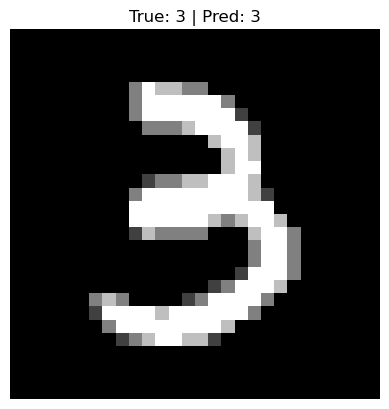

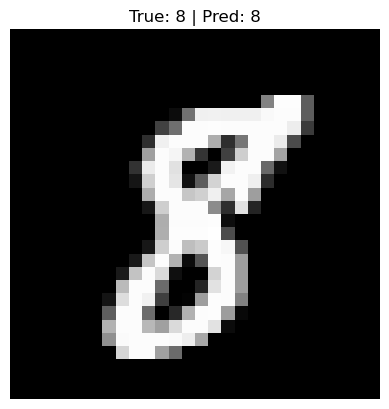

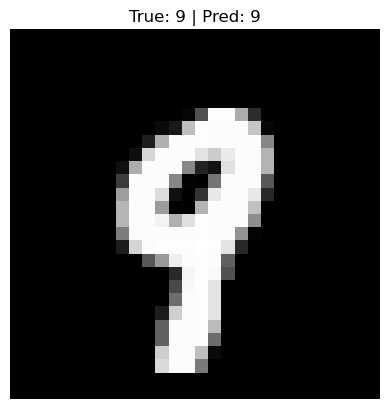

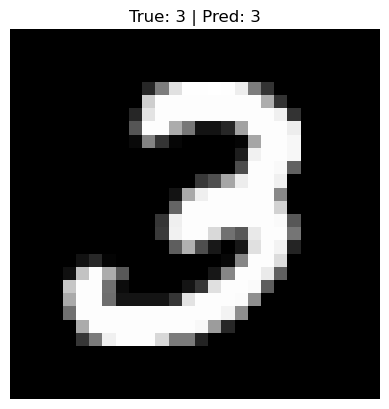

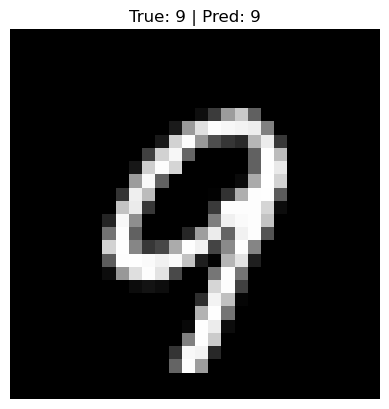

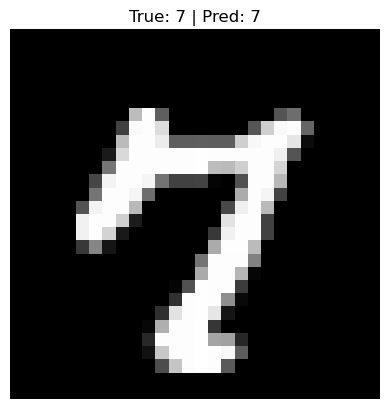

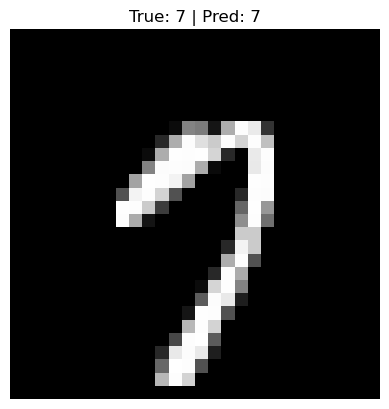

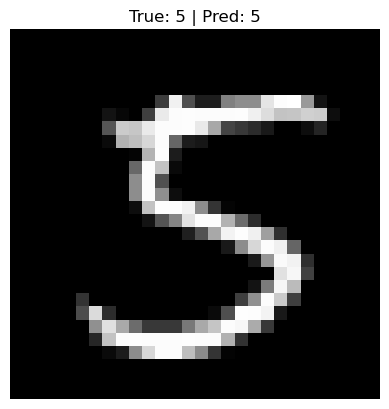

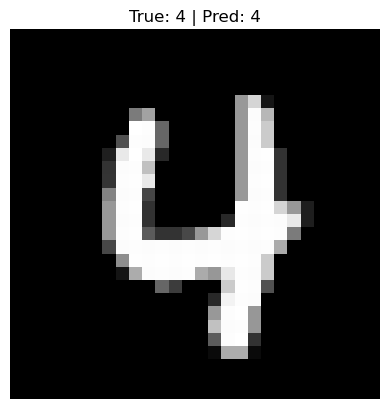

In [9]:
# Step 7: Visualize Predictions
# ======================

def show_sample_predictions(model, X, y_true, count=10):
    predictions = model.predict(X)
    pred_labels = np.argmax(predictions, axis=1)
    true_labels = np.argmax(y_true, axis=1)

    for i in range(count):
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {true_labels[i]} | Pred: {pred_labels[i]}")
        plt.axis('off')
        plt.show()

print("\n🔍 Sample Predictions from Tracy")
show_sample_predictions(tracy, X_test, y_test)